In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Task 1: Histogram Analysis
def plot_histogram(image, title, is_color=False):
    plt.figure()
    if is_color:
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Intensity Values')
    plt.ylabel('Number of Pixels')
    plt.show()

def histogram_analysis(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plot_histogram(image, "Histogram of Color Image", is_color=True)
    plot_histogram(gray_image, "Histogram of Grayscale Image")

    equalized_image = cv2.equalizeHist(gray_image)
    plot_histogram(equalized_image, "Histogram of Equalized Grayscale Image")

    cv2_imshow(gray_image)
    cv2_imshow(equalized_image)

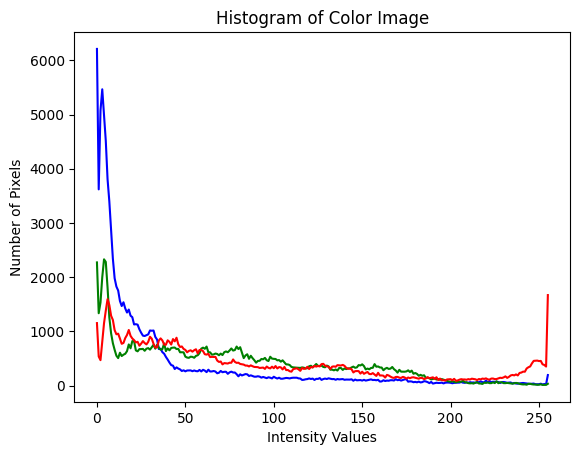

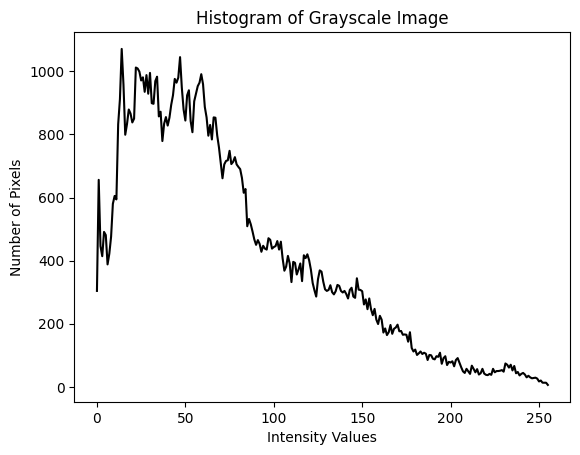

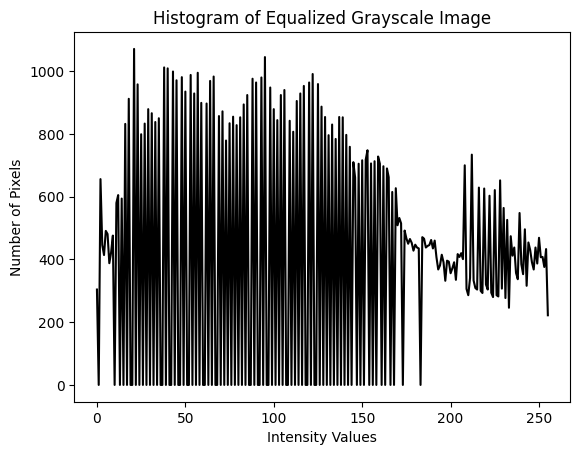

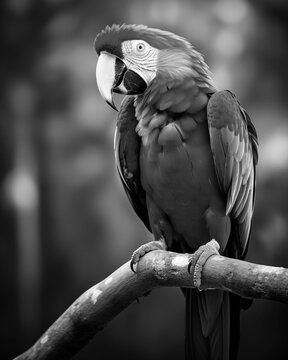

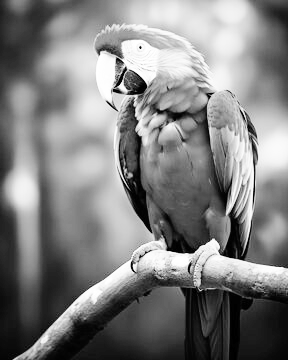

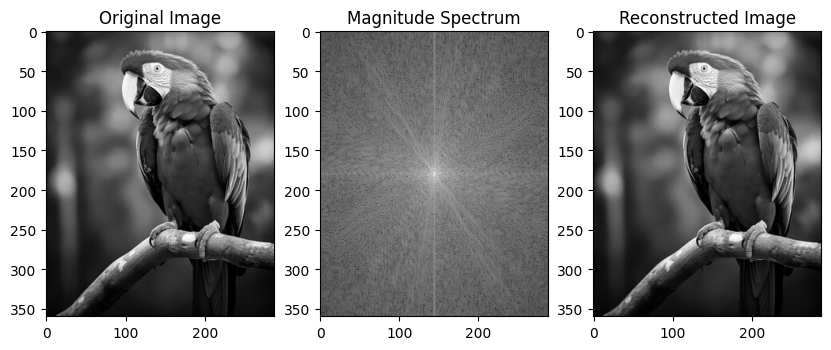

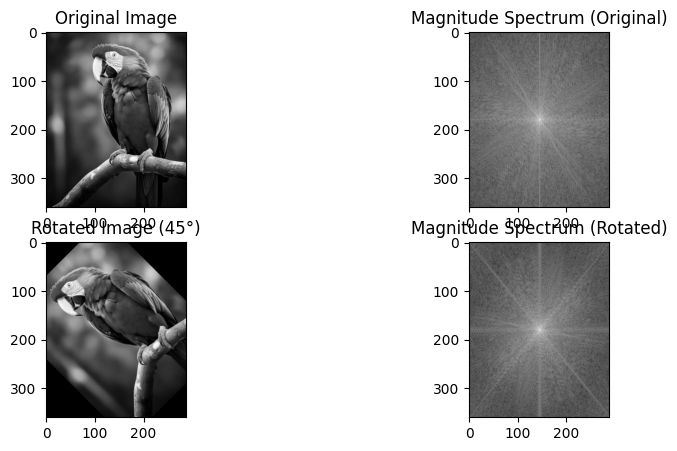

In [ ]:
# Task 2: Fourier Transform Analysis
def fft_analysis(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

    # Inverse Fourier Transform
    idft_shift = np.fft.ifftshift(dft_shift)
    reconstructed_image = np.abs(np.fft.ifft2(idft_shift))

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")

    plt.subplot(1, 3, 3)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Reconstructed Image")
    plt.show()

def rotation_property_verification(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    (h, w) = image.shape
    center = (w // 2, h // 2)

    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    dft_original = np.fft.fftshift(np.fft.fft2(image))
    magnitude_spectrum_original = 20 * np.log(np.abs(dft_original) + 1)

    dft_rotated = np.fft.fftshift(np.fft.fft2(rotated_image))
    magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated) + 1)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(2, 2, 2)
    plt.imshow(magnitude_spectrum_original, cmap='gray')
    plt.title("Magnitude Spectrum (Original)")

    plt.subplot(2, 2, 3)
    plt.imshow(rotated_image, cmap='gray')
    plt.title("Rotated Image (45°)")

    plt.subplot(2, 2, 4)
    plt.imshow(magnitude_spectrum_rotated, cmap='gray')
    plt.title("Magnitude Spectrum (Rotated)")
    plt.show()

# Example Usage
image_path = '/content/Parrot.jpg'  # Change this to your actual image path
histogram_analysis(image_path)
fft_analysis(image_path)
rotation_property_verification(image_path)
